In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, InputLayer
import matplotlib.pyplot as plt

In [3]:
(X_treinamento, _), (X_teste, _) = mnist.load_data()

In [4]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
28*28

784

In [6]:
X_treinamento[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_treinamento = X_treinamento.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255

In [8]:
X_treinamento[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
X_treinamento.shape, len(X_treinamento), np.prod(X_treinamento.shape[1:])

((60000, 28, 28), 60000, 784)

In [10]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_treinamento.shape

(60000, 784)

In [11]:
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste.shape

(10000, 784)

In [13]:
#784 -> 32 -> 784
autoencoder = Sequential()
autoencoder.add(InputLayer(shape = (784,)))
autoencoder.add(Dense(units=32, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
autoencoder.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [16]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=50,
                batch_size=256, validation_data=(X_teste, X_teste))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0104 - loss: 0.3816 - val_accuracy: 0.0096 - val_loss: 0.1923
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0109 - loss: 0.1815 - val_accuracy: 0.0106 - val_loss: 0.1536
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0099 - loss: 0.1487 - val_accuracy: 0.0096 - val_loss: 0.1327
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0090 - loss: 0.1308 - val_accuracy: 0.0091 - val_loss: 0.1211
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0098 - loss: 0.1201 - val_accuracy: 0.0083 - val_loss: 0.1132
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0087 - loss: 0.1130 - val_accuracy: 0.0099 - val_loss: 0.1075
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0101 - loss: 0.1076 - val_accuracy: 0.0101 - val_loss: 0.1031
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0109 - loss: 0.1035 - val_accuracy: 0

In [17]:
# 784 -> 32
dimensao_original = Input(shape=(784,))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensao_original, camada_encoder(dimensao_original))
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
imagens_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step


In [19]:
imagens_decodificadas = autoencoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


In [20]:
np.random.randint(X_teste.shape[0], size = 10)

array([1607, 7097, 5233, 2676, 9982, 6347, 1875, 5778, 2054, 5903])

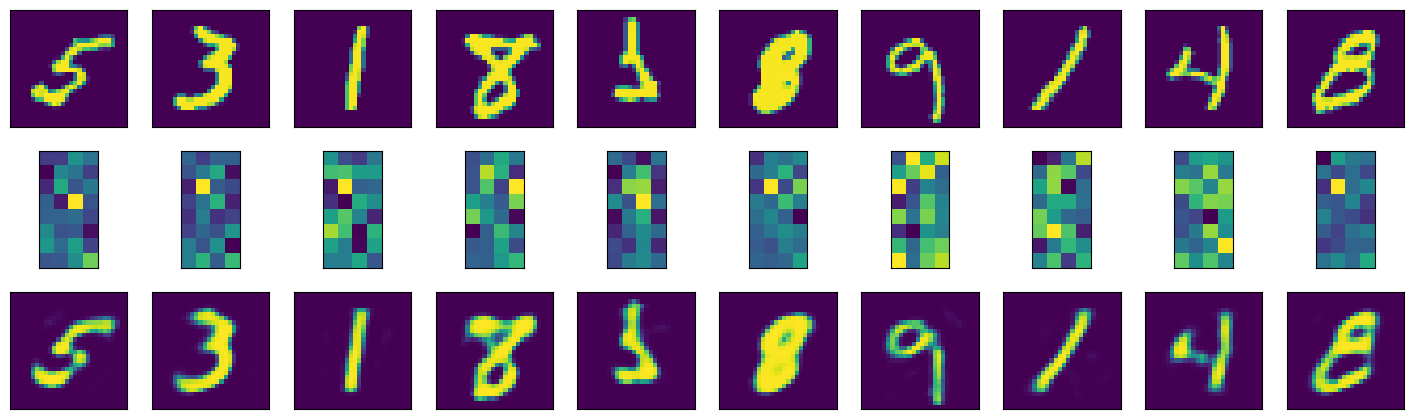

In [21]:
numero_imagens = 10
imagens_teste = np.random.randint(X_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):
  # Imagem original
  eixo = plt.subplot(10, 10, i + 1)
  plt.imshow(X_teste[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())

  # Imagem codificada
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 4))
  plt.xticks(())
  plt.yticks(())

  # Imagem reconstruída
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())